# BTrack

In the last chapter we have used Trackpy for tracking of nuclei over time. While very easy to use, the main limitation is that it can't handle track splitting/merging as is required for many biology experiments. BTrack is an alternative package to provides this possibility. It is though more difficult to use as many paramters can be set. Here we briefly demo it using the napari plugin of BTrack.

## Installation

The plugin is not yet on PyPi, so you will have to install the software directly from the repository using:

In [ ]:
pip install git+https://github.com/lowe-lab-ucl/napari-btrack.git

## Creating the segmentation

For the segmentation, we just re-use our previous code. The only difference is that now we keep the label image as this is the basic input for BTrack:

In [1]:
import numpy as np
import skimage
from microfilm.microplot import microshow
import pandas as pd
import matplotlib.pyplot as plt
import napari
from napari.utils import nbscreenshot

image = skimage.io.imread('../data/20210904_TL2 - R05-C03-F0.tiff')
label_time = np.load('../data/HeLA_stardist_versatile_fluo.npy')

We obtained as stack of labels, each layer representing one time point. Now we can open this stack in napari:

In [2]:
image.shape

(240, 5, 540, 540)

In [ ]:
viewer = napari.Viewer()
viewer.add_image(image[:,4]);
viewer.add_labels(label_time);

And using the BTrack plugin we can set all the parameters as needed (we leave here all defaults) and hit Run:

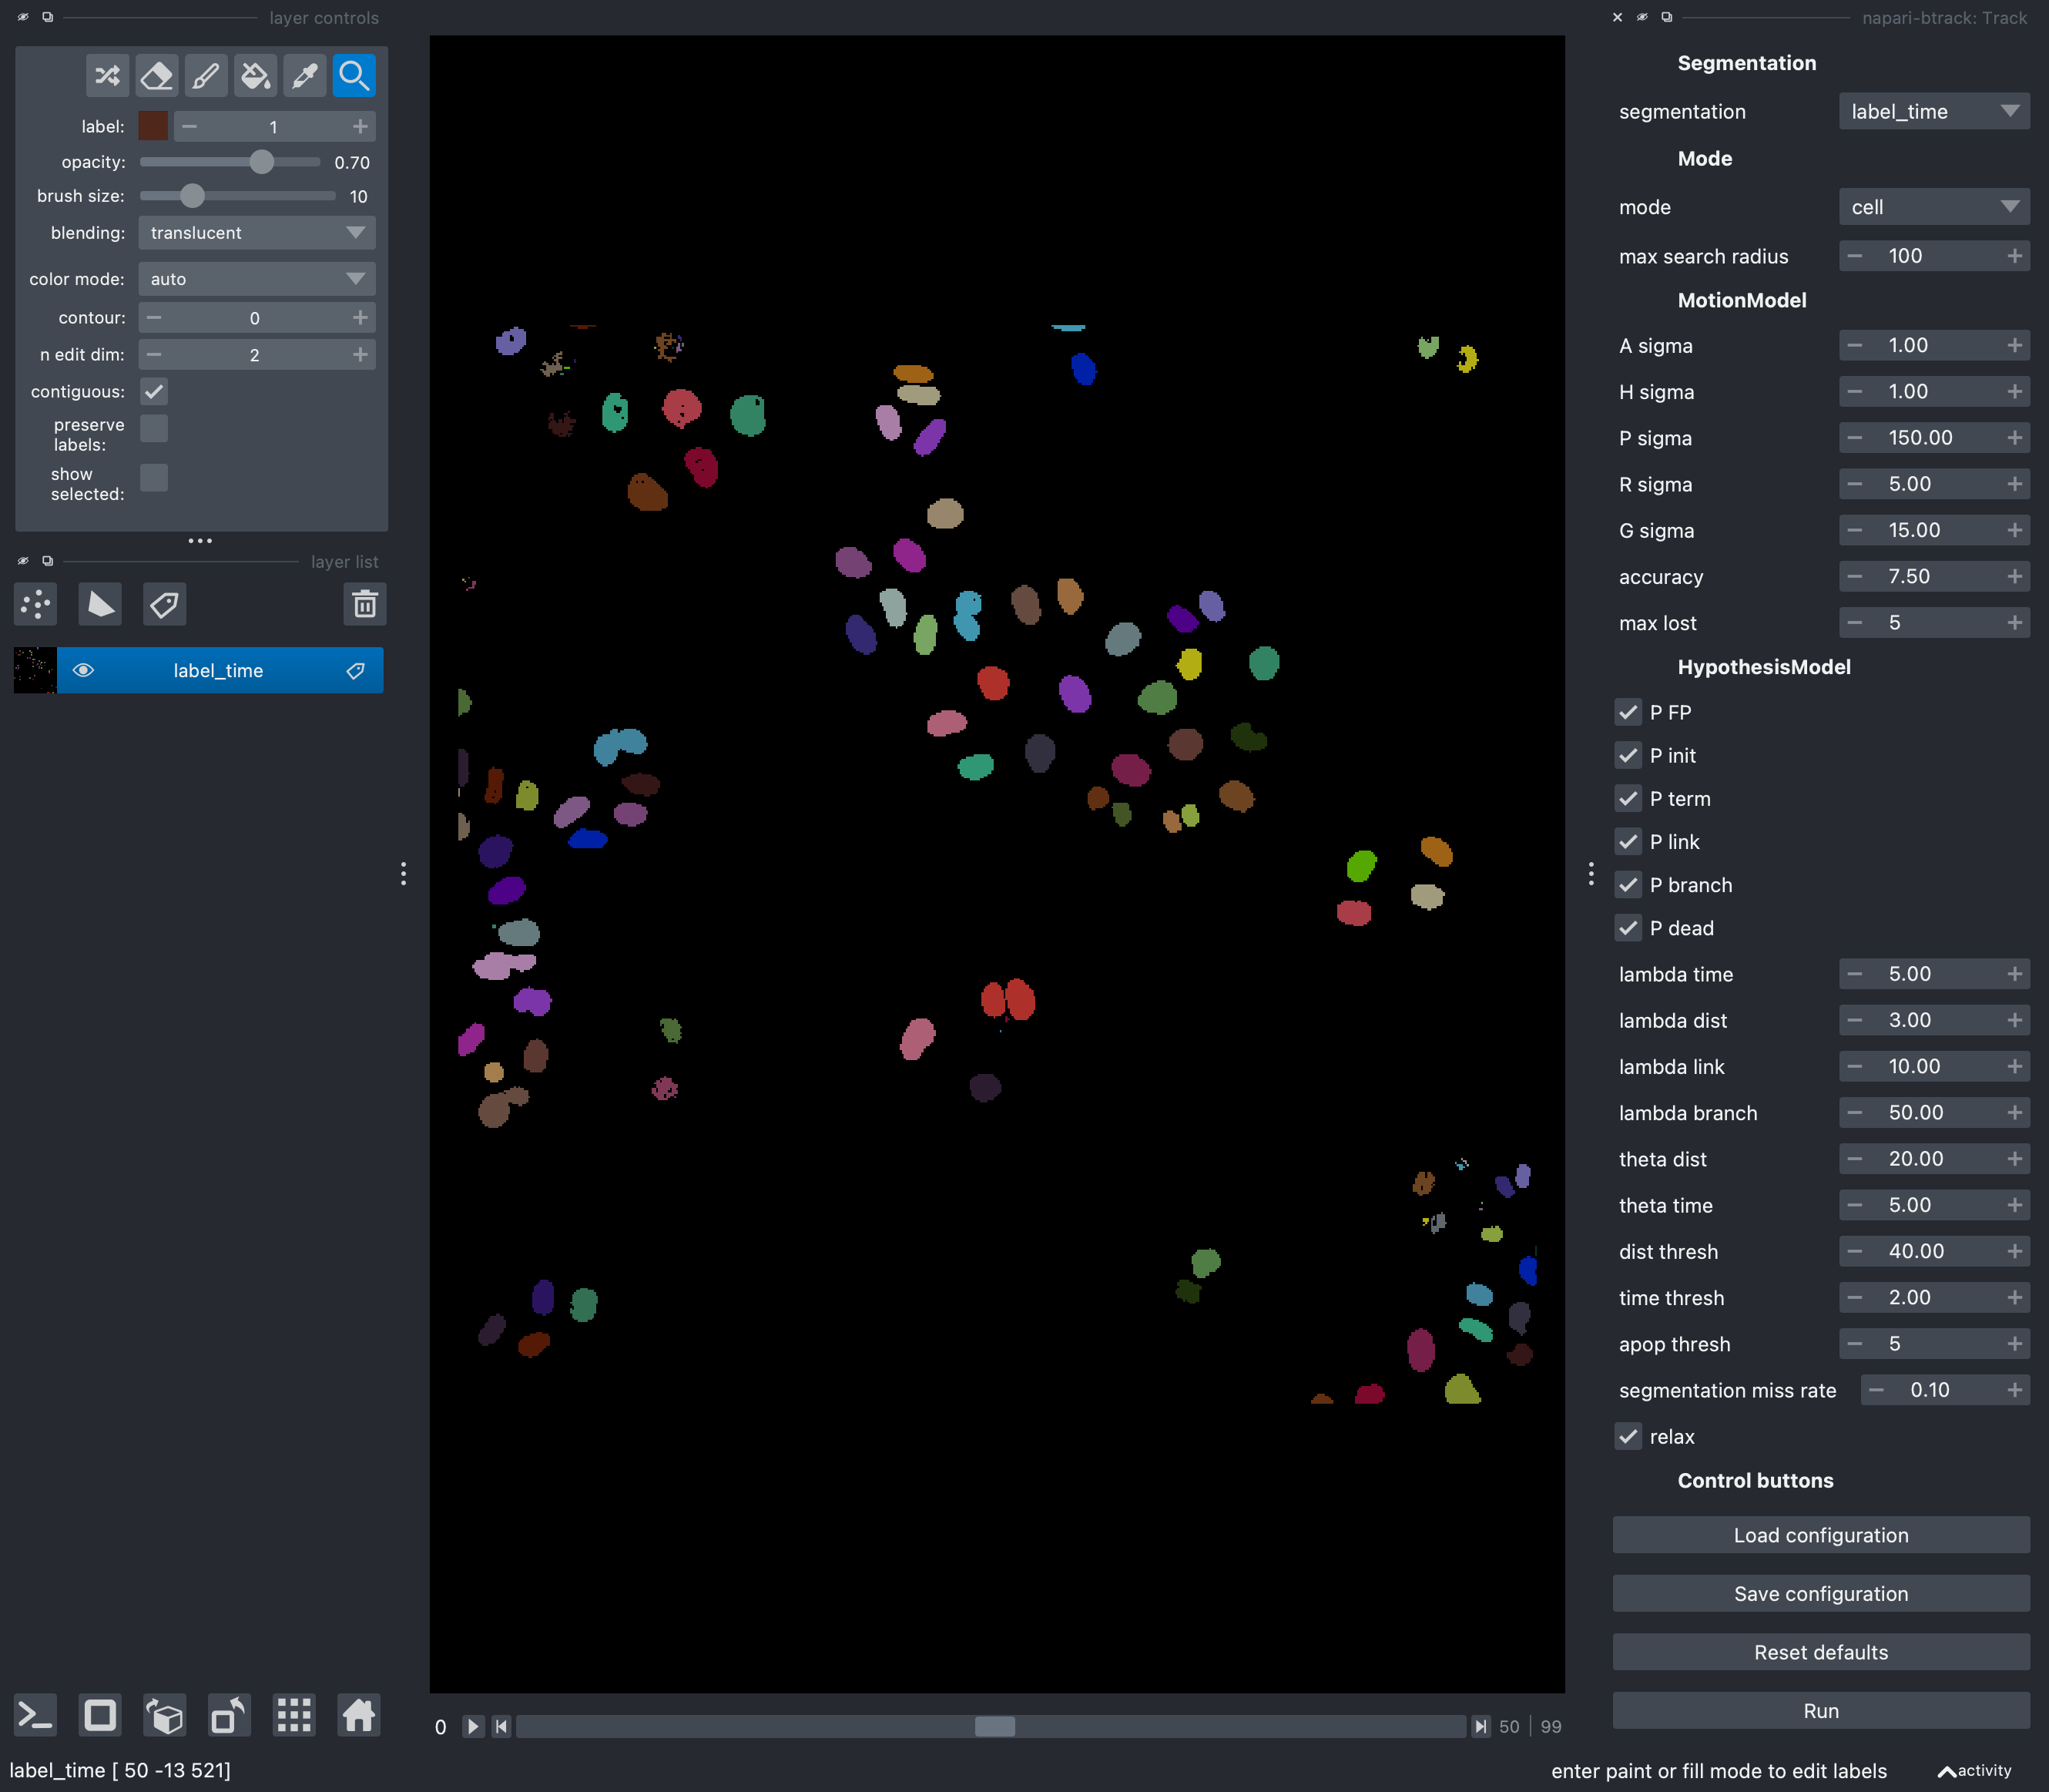

In [17]:
nbscreenshot(viewer)

The result is similar to what we obtained before. A new tracks layer has been added to the viewer:

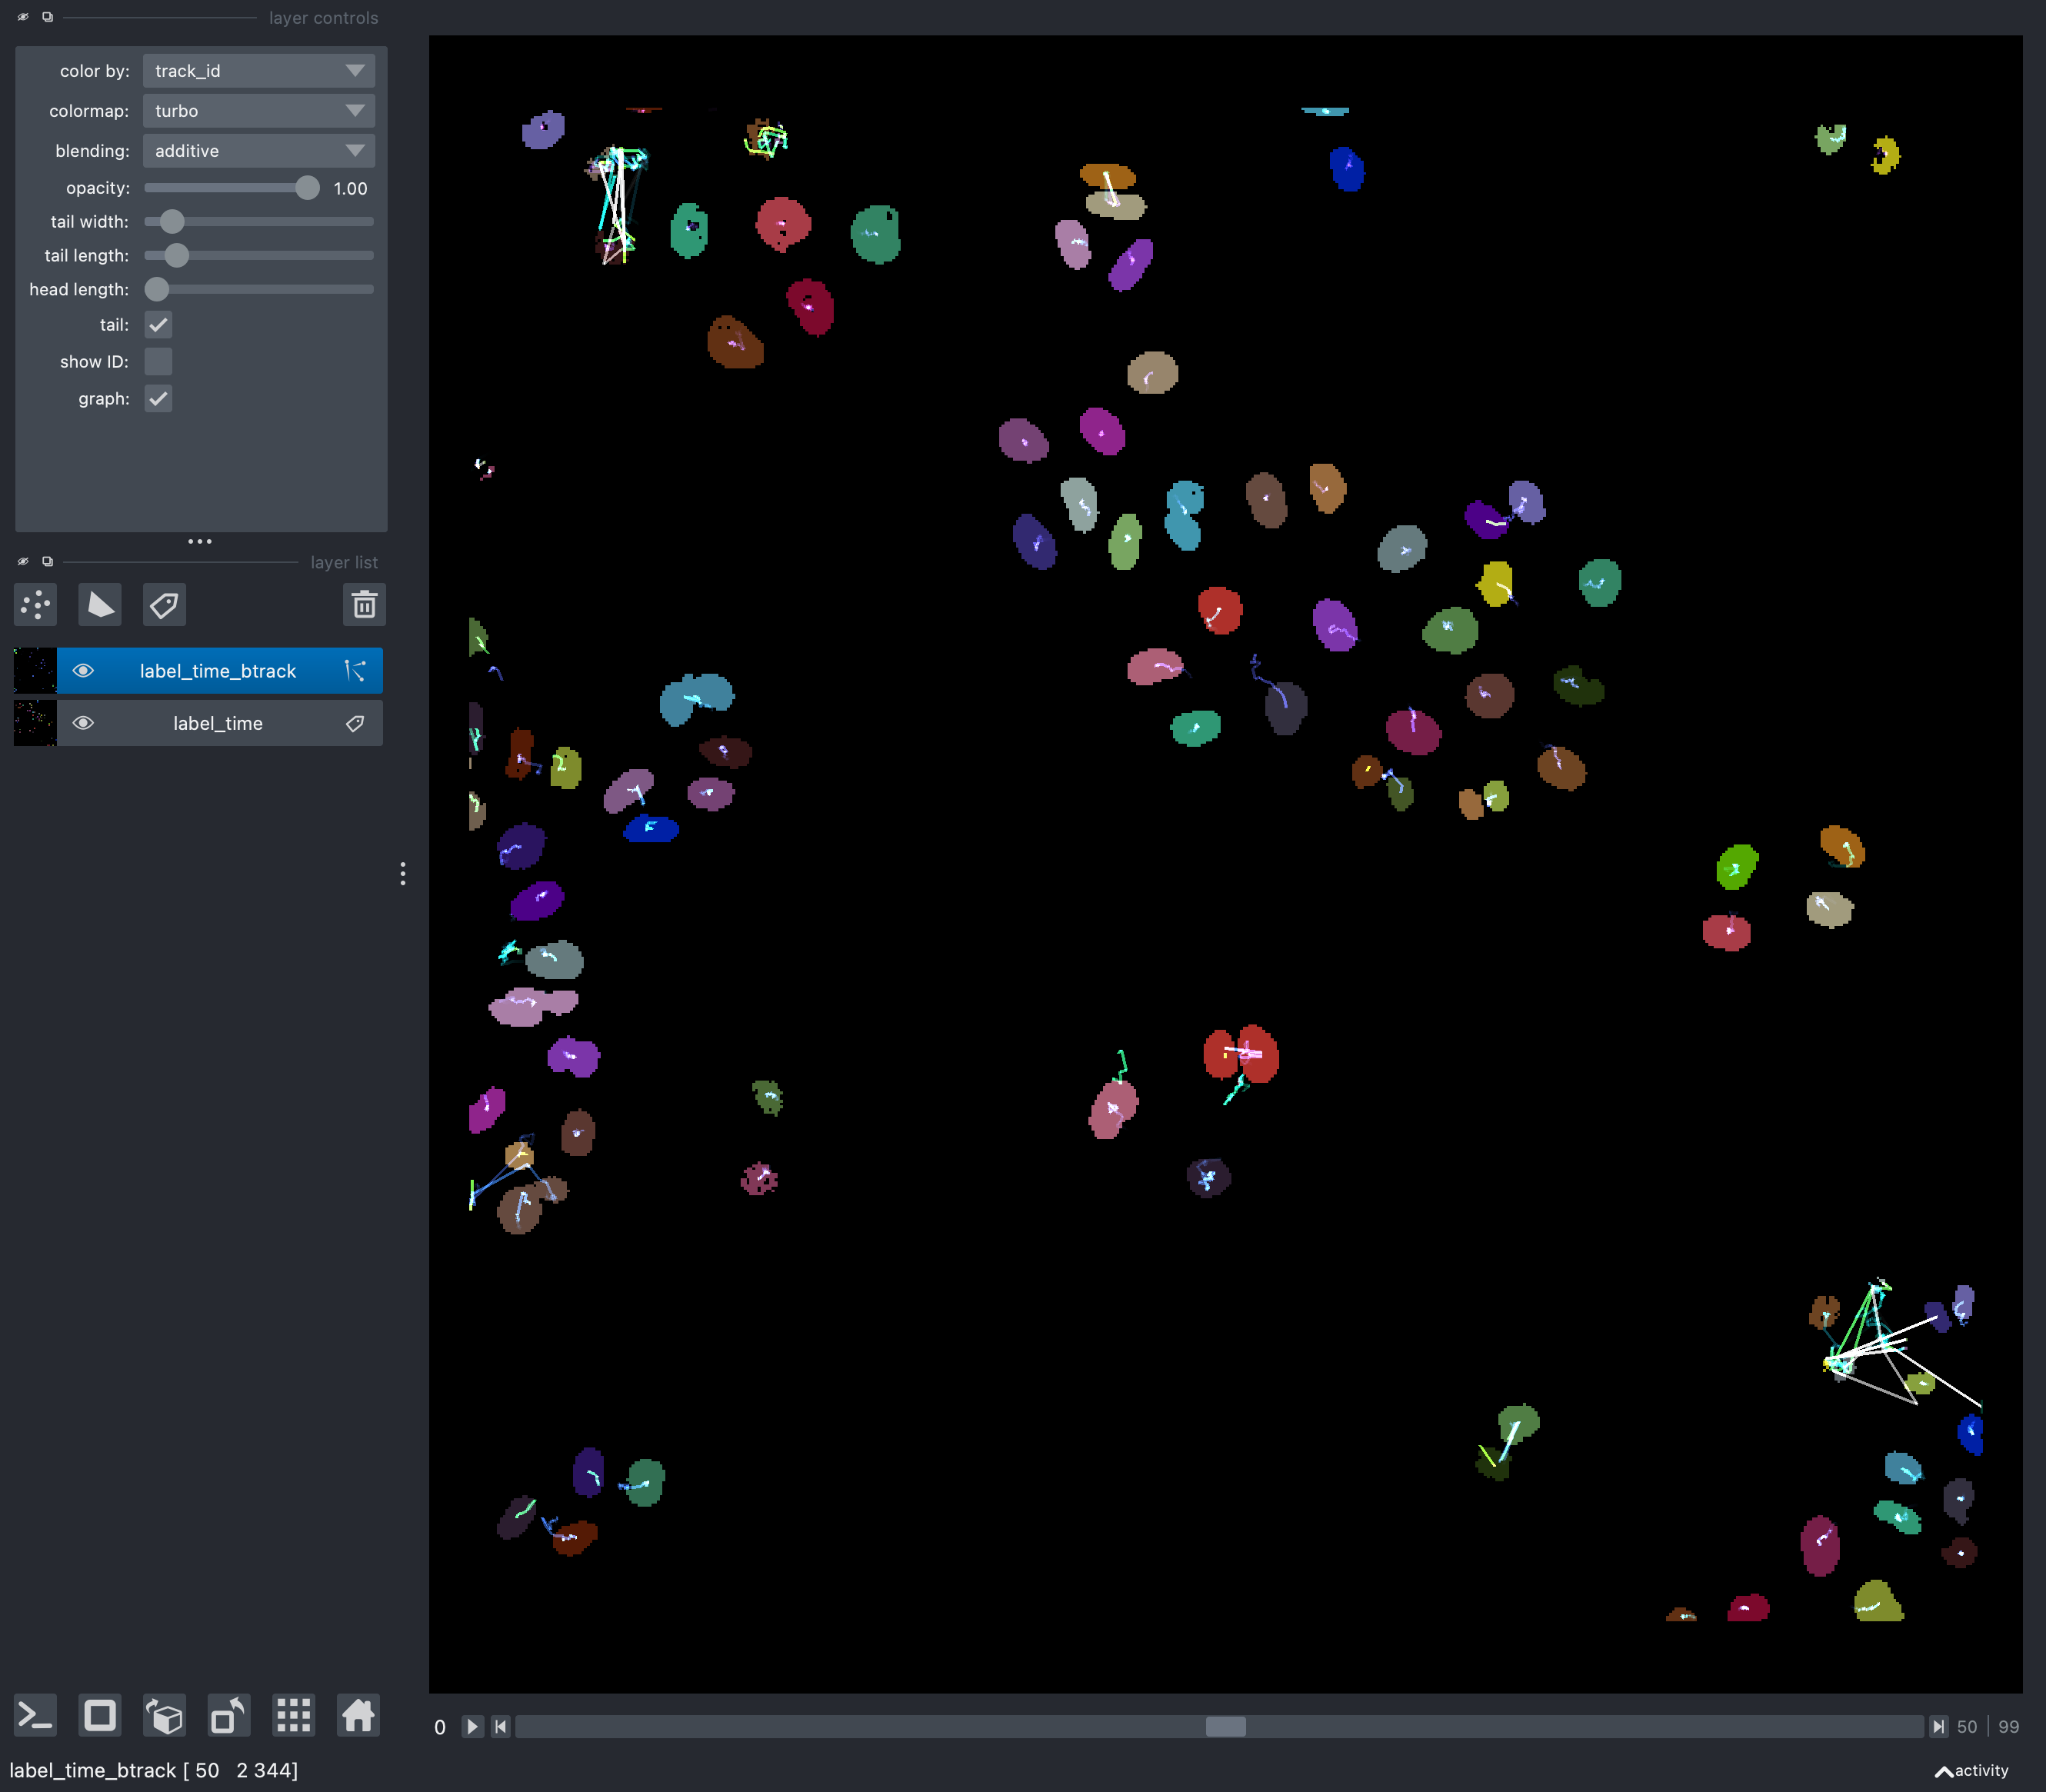

In [20]:
nbscreenshot(viewer)

If needed we can recover those tracks from the layer as:

In [7]:
viewer.layers[2].data

array([[1.00000000e+00, 0.00000000e+00, 2.03451327e+02, 3.90522124e+02],
       [1.00000000e+00, 1.00000000e+00, 2.02622047e+02, 3.89456693e+02],
       [1.00000000e+00, 2.00000000e+00, 2.02713287e+02, 3.86797203e+02],
       ...,
       [1.22400000e+03, 2.39000000e+02, 3.08139535e+00, 2.06930233e+02],
       [1.22500000e+03, 2.39000000e+02, 2.02462366e+02, 4.04892473e+02],
       [1.22700000e+03, 2.39000000e+02, 2.65168539e+00, 6.13258427e+01]])

Here again, the first column is the track ID, the second the frame, and the two last the coordinates.

In addition we can also recover a graph that represents splitting events:

In [5]:
viewer.layers[2].graph

{143: [16],
 145: [16],
 200: [190],
 202: [190],
 215: [51],
 217: [51],
 235: [23],
 237: [23],
 285: [114],
 286: [114],
 291: [110],
 292: [110],
 298: [276],
 300: [276],
 301: [83],
 302: [83],
 313: [300],
 317: [127],
 318: [127],
 324: [300],
 359: [27],
 362: [27],
 372: [30],
 373: [30],
 391: [17],
 398: [17],
 412: [12],
 413: [153],
 416: [153],
 418: [12],
 439: [217],
 440: [8],
 442: [217],
 448: [8],
 477: [251],
 479: [253],
 480: [251],
 481: [253],
 482: [22],
 483: [34],
 487: [22],
 489: [34],
 496: [483],
 497: [483],
 524: [519],
 530: [519],
 550: [476],
 551: [476],
 573: [46],
 575: [541],
 576: [46],
 577: [541],
 627: [302],
 634: [302],
 652: [331],
 659: [331],
 671: [6],
 673: [6],
 698: [671],
 701: [671],
 702: [668],
 704: [668],
 715: [711],
 719: [718],
 724: [711],
 725: [718],
 734: [719],
 735: [719],
 740: [279],
 742: [279],
 745: [67],
 748: [67],
 750: [735],
 752: [735],
 753: [132],
 754: [132],
 761: [134],
 763: [134],
 766: [745],
 770:

Each of these lines represents a splitting event. For example at the very top, the track with ID 59, split into tracks 98 and 99. A companion plugin called napari-arboretum allows to visualize these tree relations between generations:

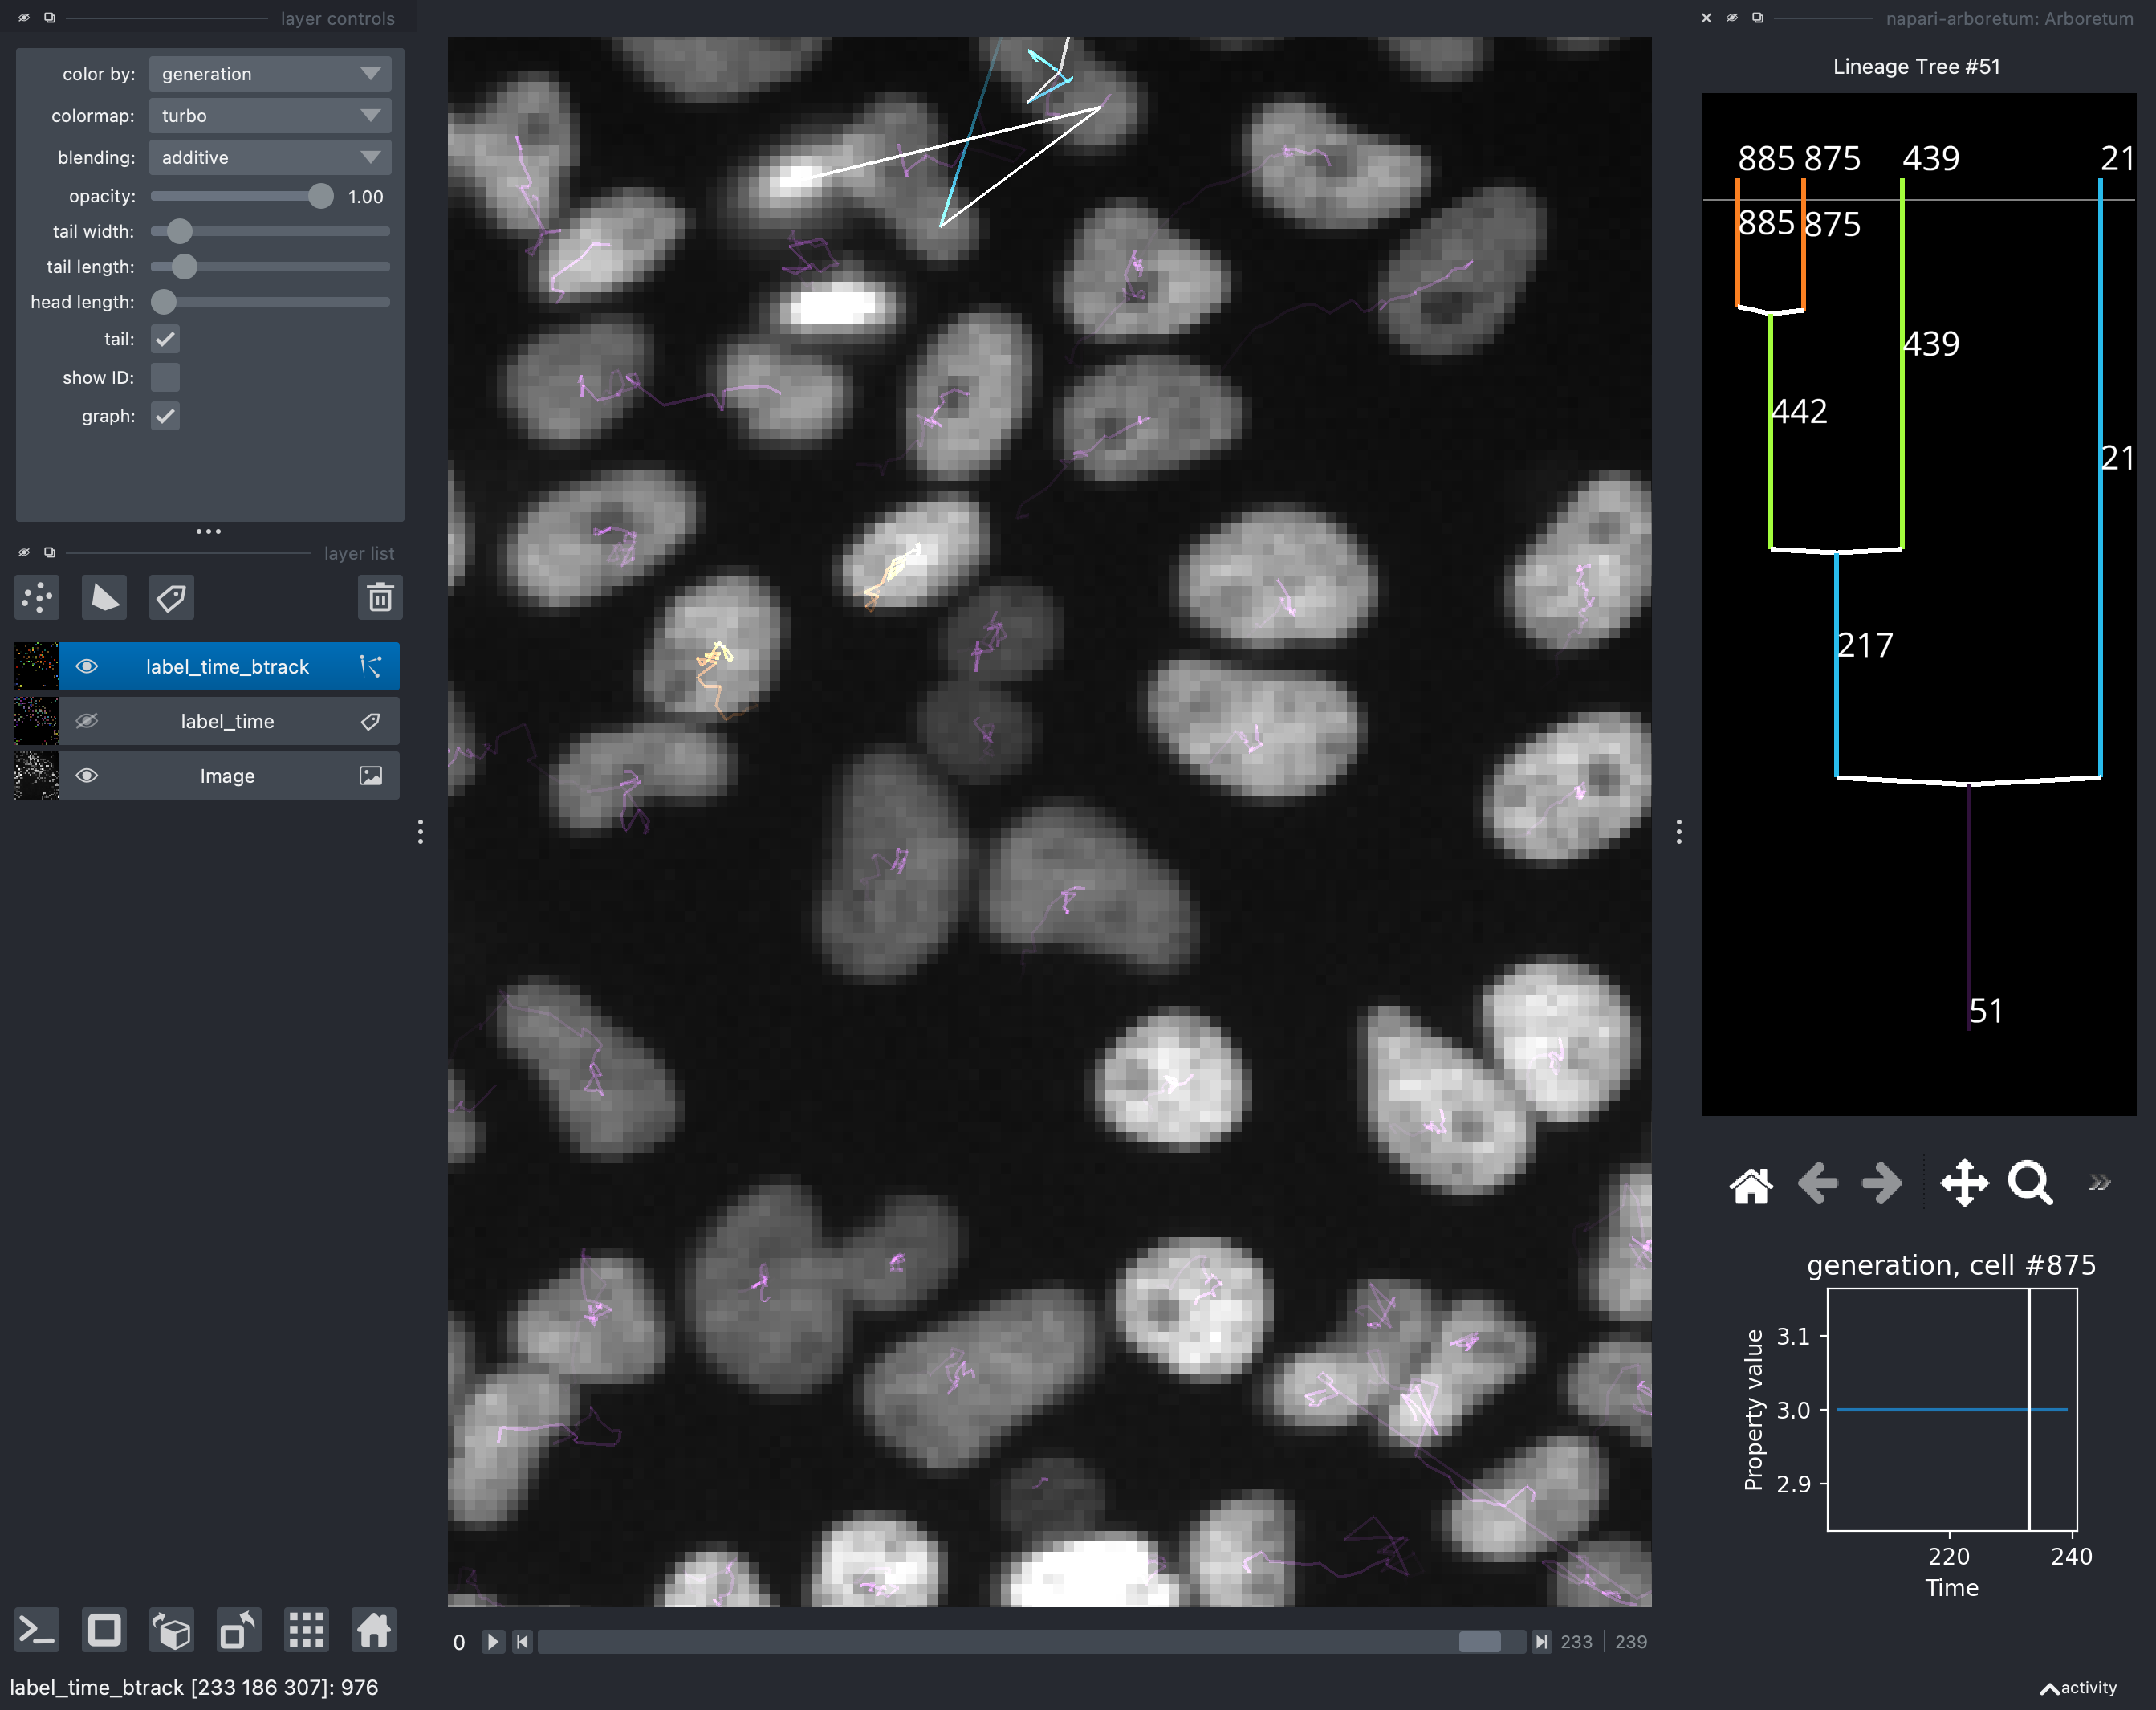

In [6]:
nbscreenshot(viewer)